# 1.Data Introduction

In [1]:
# Importing the essential libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [104]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [105]:
print(df.columns)

print('Number of the columns at first : ' , len(df.columns))

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')
Number of the columns at first :  25


In [106]:
# Shape of the dataset
df.shape

(30697, 25)

In [107]:
pd.set_option('display.max_columns', 500)

In [108]:
# A sample of the dataset
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


# 2.Cleaning and preprocessing the Data

#### In this section, we do some preprocessing in our data including removing duplicate and Nan values and Standardizing our datatype formats.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## 2-1. Removing duplicates

In [110]:
# Removing duplicate values for avoiding bias in our training section
df.drop_duplicates(inplace=True)

## 2-2. Standardize capitalization (all to lower case)

In [111]:
# Lowercase string values(object data types) in columns to ensure consistency and uniformity
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# 3.Data Visualization (EDA)

#### We try to make an overall glance to our data and find some relationship between features. This helps to gain insights on our data.

#### This categorical plot provides a clear visual representation of the distribution of successful and unsuccessful shots in the dataset. As you can see,  the success rate of all shots made by Kobe is nearly 44%.

In [112]:
shot_made_counts = df['shot_made_flag'].value_counts()
print(shot_made_counts[1.0]*100 / (shot_made_counts[1.0] + shot_made_counts[0.0]))

44.61610304704829


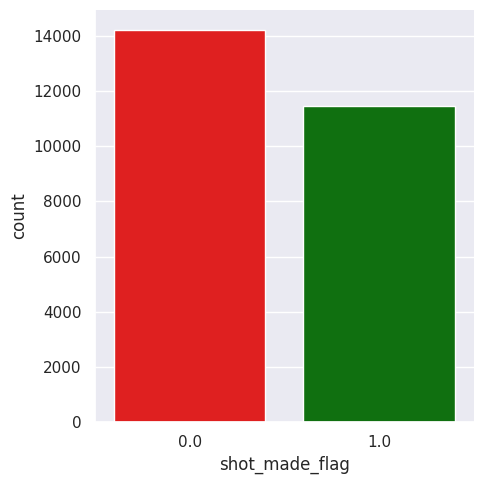

In [113]:
# Success and failure rate of the shots
sns.catplot(data=df, x="shot_made_flag", kind="count", palette={0: "red",1: "green"})

#### The visualization provides insights into areas of the court where successful and unsuccessful shots are concentrated, offering a spatial perspective on shot outcomes. As you can see, as distance increases, the shot success rate decreases. Also the center of the court, has more success shot rate rather then left and right side of the court.

<Axes: xlabel='loc_x', ylabel='loc_y'>

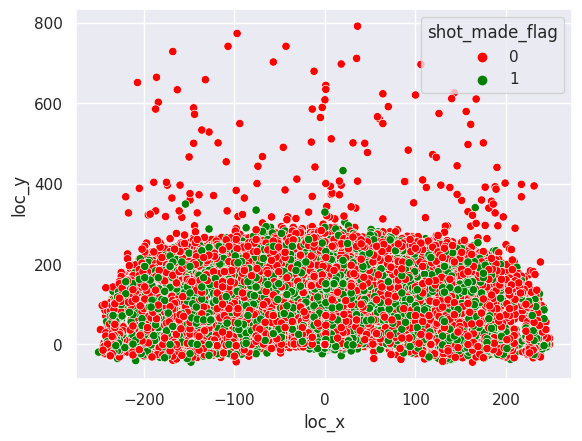

In [114]:
# Success and failure rate of the shots based on shot location on the field (x and y parameters)
sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', hue_order=[0,1],
                palette={0: "red",1: "green"})

#### This count plot provides valuable insights into the temporal distribution of shot attempts and the corresponding success rates, aiding in understanding the dynamics of shot-making throughout the game. As you can see, we can gain this important insights from the plot that as remaining time decreases, the failure rate is much more than success rate which can be due to the stress of the player.

<Axes: xlabel='minutes_remaining', ylabel='count'>

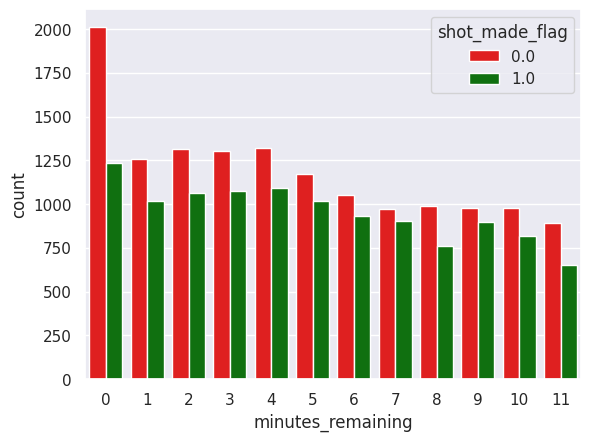

In [115]:
# Count of the successful and failed shots based on the time remaining to the end of the match
sns.countplot(data = df, x='minutes_remaining', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

#### This count plot helps in understanding how shot outcomes vary across different shot zones, providing valuable information for strategic analysis and player performance evaluation. As you can see, The most success rate and shot counts, belong to the center zone and the least success rate belongs to the back court.

<Axes: xlabel='shot_zone_area', ylabel='count'>

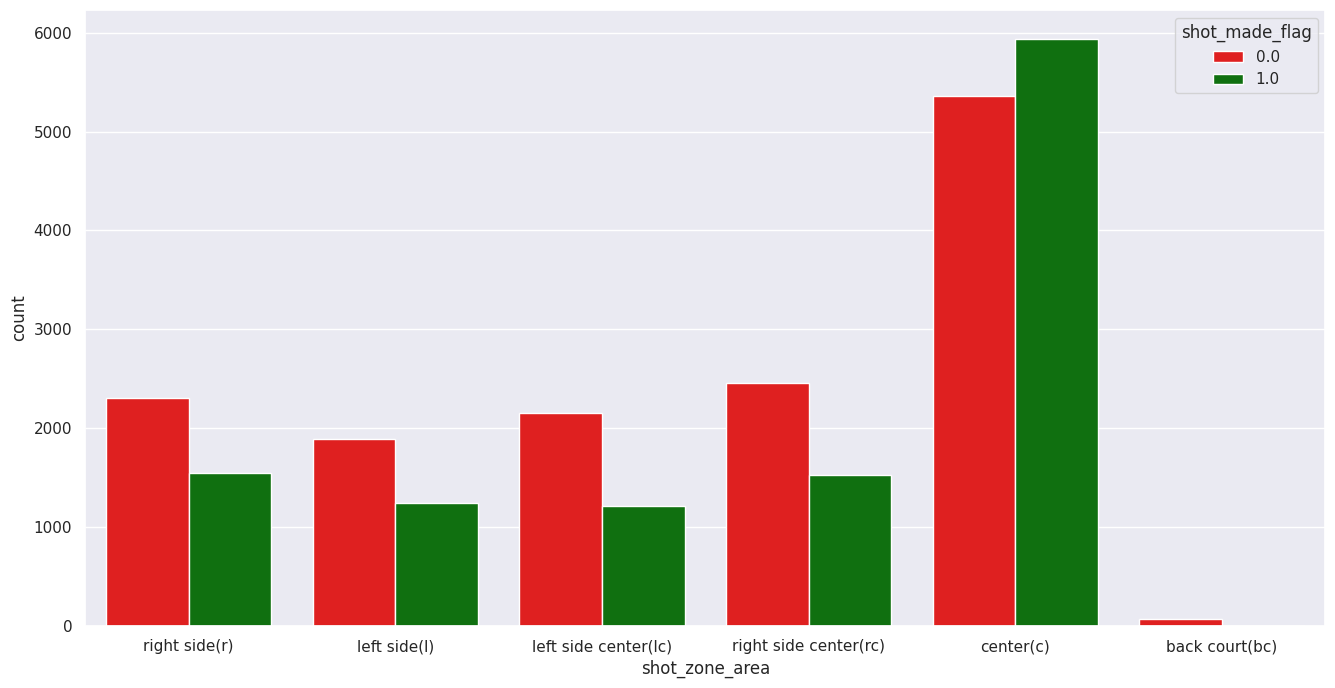

In [116]:
# Count of the successful and failed shots based on the shot zone area
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x='shot_zone_area', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

<Axes: xlabel='shot_zone_range', ylabel='shot_zone_area'>

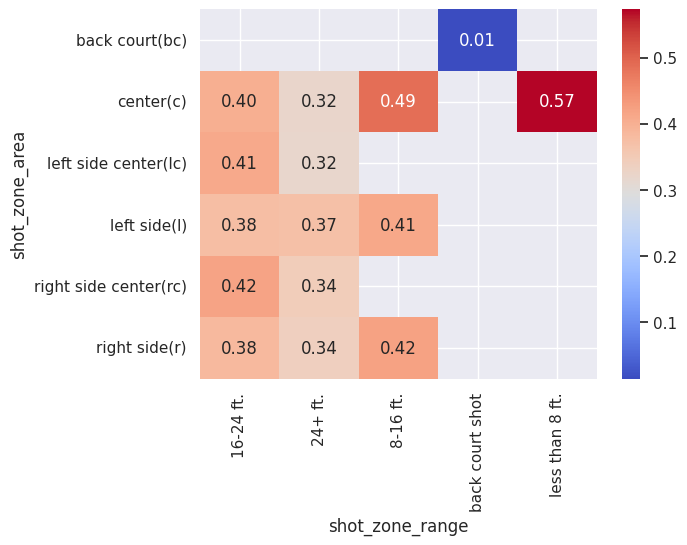

In [117]:
pivot_table = df.pivot_table(index='shot_zone_area', columns='shot_zone_range', values='shot_made_flag', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")

#### This count plot provides a quick overview of the distribution of shot outcomes within various combined shot types, offering insights into the effectiveness of different types of shots. As we can understand, most of the shots made by Kobe, was 'jump shot' while 'dunk' and 'layup' has more success rate than 'jump shot'

<Axes: xlabel='combined_shot_type', ylabel='count'>

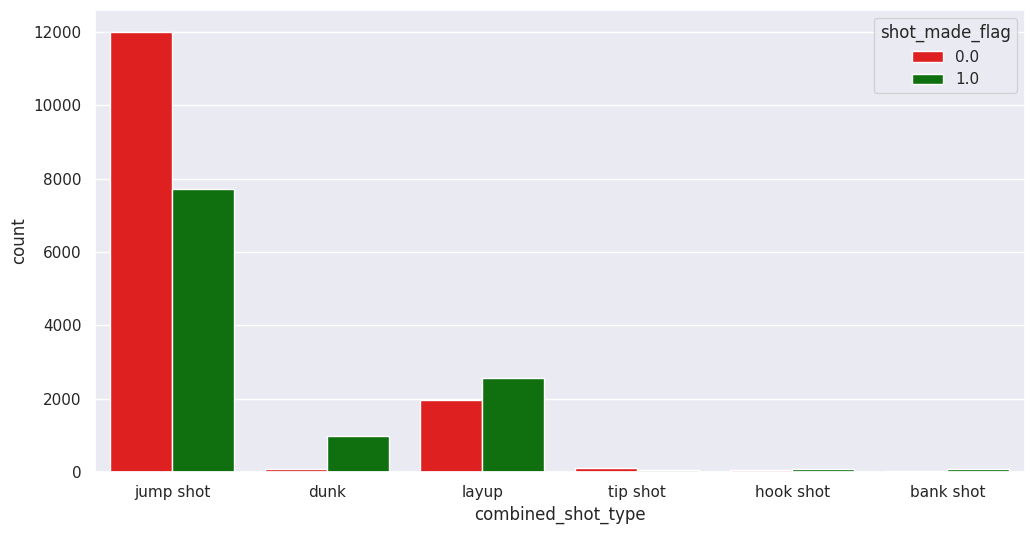

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='combined_shot_type', hue='shot_made_flag', palette={0: "red", 1: "green"})

#### This categorical plot provides a quick overview of how shot outcomes vary against various opponents, offering insights into performance differences based on the opposing teams.

<Figure size 1600x800 with 0 Axes>

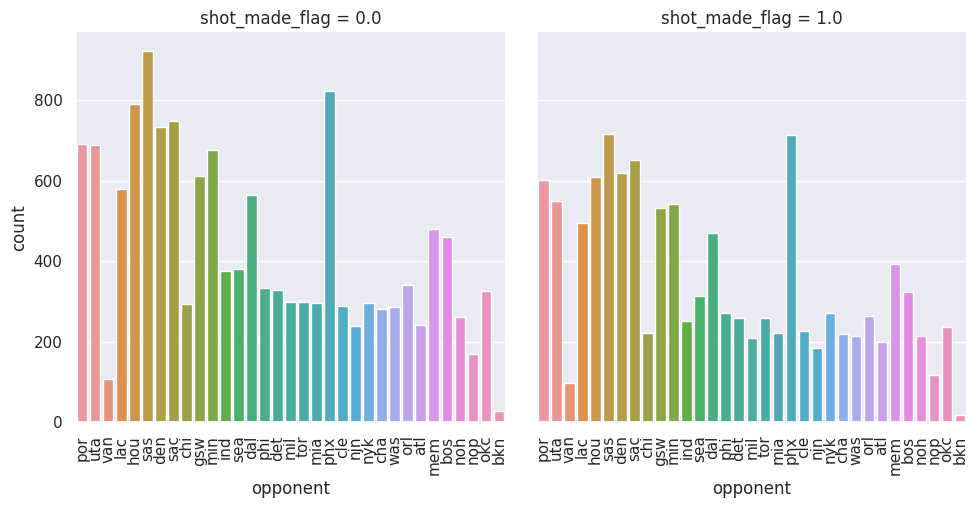

In [119]:
plt.figure(figsize=(16, 8))
plot = sns.catplot(data=df, x="opponent", col="shot_made_flag", kind="count", )
plot.set_xticklabels(rotation=90)
plt.show()

<Axes: xlabel='game_date', ylabel='shot_made_flag'>

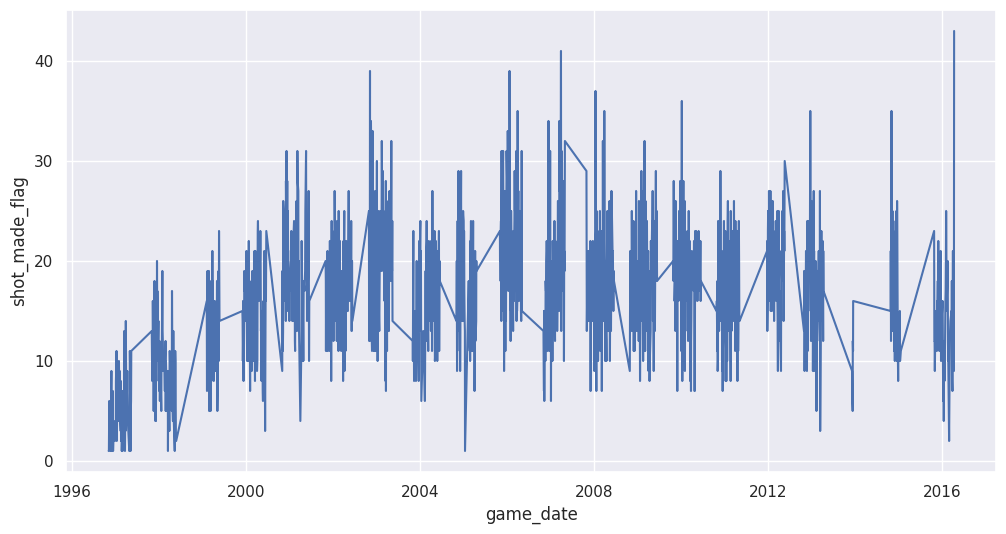

In [120]:
plt.figure(figsize=(12, 6))
df['game_date'] = pd.to_datetime(df['game_date'])
sns.lineplot(data=df, x='game_date', y='shot_made_flag', estimator='count', errorbar=None)

<Axes: xlabel='game_year', ylabel='count'>

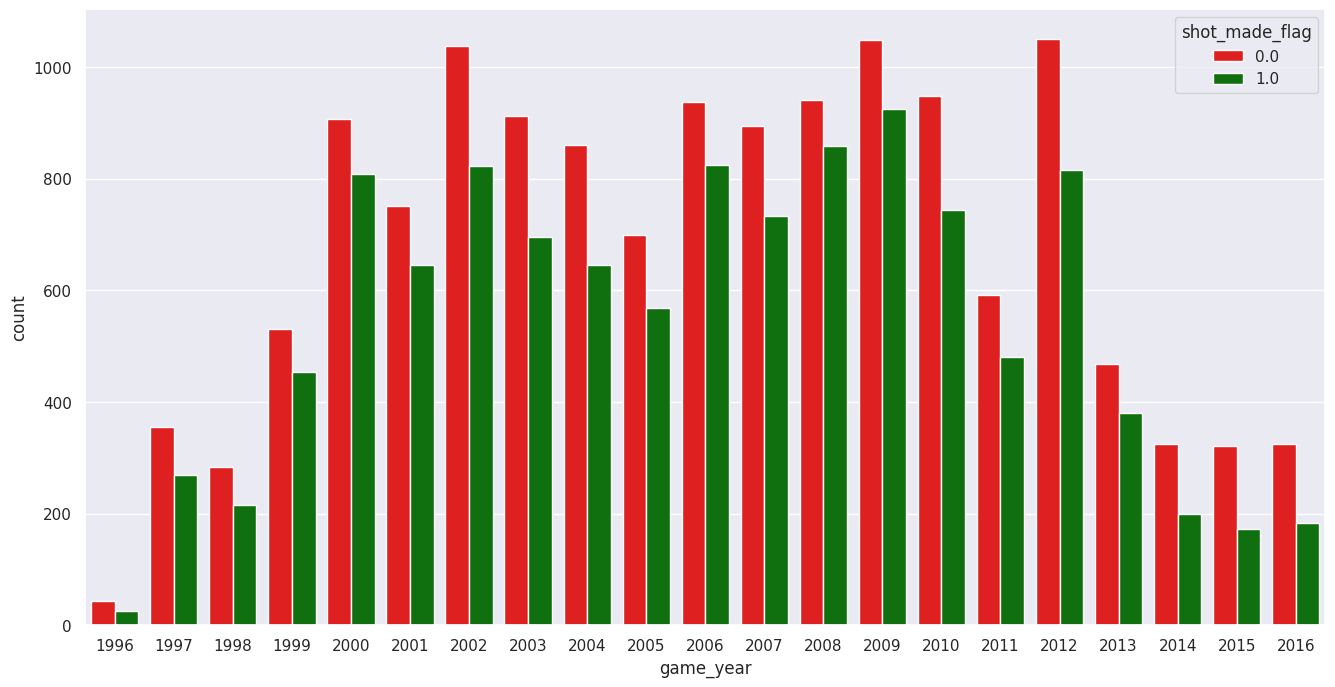

In [121]:
# Count of the successful and failed shots based on the subsequent years of the player's career
# We need to extract the year and add it as a column to the dataset
df['game_year'] = df['game_date'].dt.year

plt.figure(figsize=(16, 8))
sns.countplot(data = df, x='game_year', hue='shot_made_flag', palette={0.0: "red",1.0: "green"})

# 4.Feature Engineering

In [122]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'game_year'],
      dtype='object')

In [123]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,game_year
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000,2006.098446
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943,4.835462
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000,1996.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000,2002.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000,2006.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000,2010.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,2016.000000


#### At first, we dropped 3 columns for feature reduction. The resons behind this is : </br>1. Kobe played only in one team his whole career, so "team_name" column, is useless.</br>2. For the same reason, 'team_id' column is useless too!</br>3. 'shot_id' is also not as much important as other features.

In [124]:
# Dropping columns that will not affect the model (e.g. df['team_name'].unique() --> 'Los Angeles Lakers')
df = df.drop(['team_name', 'team_id' , 'shot_id'], axis=1)

In [125]:
# The matchup column provides information about the game pairing, specifying the teams involved and whether the game is at home or away
# So, we add a new column called 'home' that indicates whether the match was at home or away

def hometest(row):

  if 'vs' in row['matchup']:
    return 1

  else:
    return 0

df['home'] = df.apply(lambda row : hometest(row) , axis = 1)
df.drop('matchup' , axis = 1 , inplace = True)

#### Notice: We should have put the pair plot before the feature engineering process. Since we used some features of this process (e.g. 'home') in the pairplot, for the sake of notebook organization, we decided to put the plot here.
#### It is always a good practice to have a look at the correlation between features with a pairplot. The pairplot can provide insights into how shot distance, latitude, and longitude relate to the success or failure of basketball shots. As you can interpret from the visualisations, as distance increases, the shot success rate, decreases. Also it is abvious that shots from the center of the court, has more success rate than other places. Having said that, at this stage, we see that there is no meaningful correlation between the extrcted features 'home' and success/failure rate.



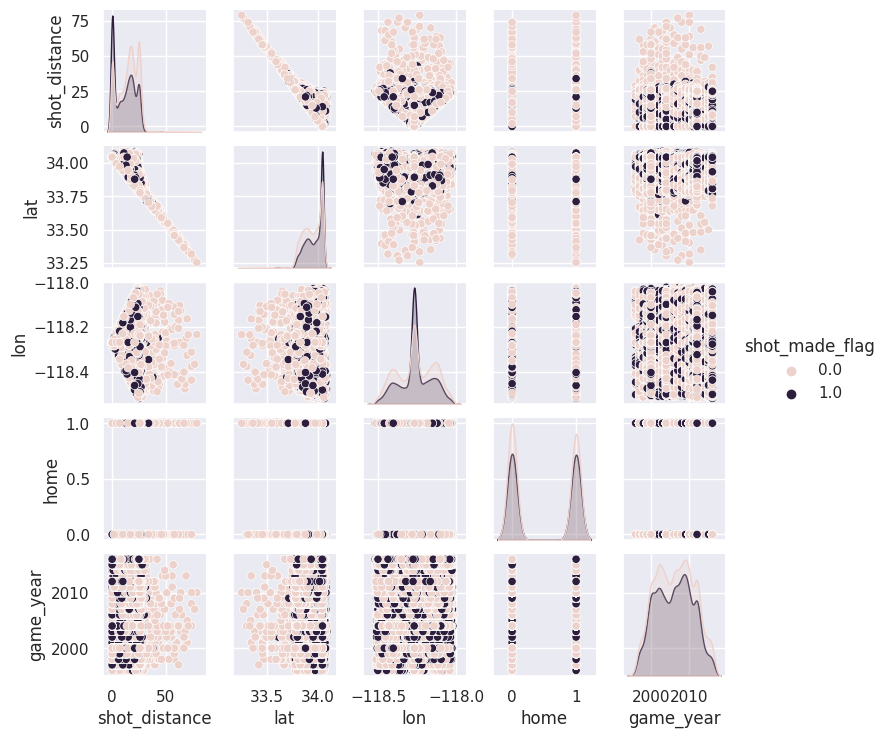

In [47]:
# It is always a good practice to explore the correlation between the features with a pairplot
sns.pairplot(df[['shot_distance','lat','lon','home','game_year','shot_made_flag']], hue='shot_made_flag', height=1.5);

In [126]:
# We built another feature called total_time_remaining to calculate remaining time(in minutes) of the game based on existing data
df["total_time_remaining"] = df["minutes_remaining"]*60 + df["seconds_remaining"] + (4-df["period"])*60

In [127]:
# Ordinal values encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order for encoding the 'shot_zone_range' variable
distance_order = ['less than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'back court shot']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[distance_order], dtype=int)

# Apply ordinal encoding to the 'shot_zone_range' column in the dataset
# The result is stored in a new variable called 'new'
new = ordinal_encoder.fit_transform(df[['shot_zone_range']])

# Replace the original 'shot_zone_range' column in the dataset with the encoded values
df['shot_zone_range'] = new

In [128]:
# Calculate shot distance based on "loc x" and "loc y" coordinates
df["distance"] = df.apply(lambda row: 0.1*(row["loc_x"]**2 + row["loc_y"]**2)**0.5, axis = 1)

In [129]:
# Binning 'loc_x' and 'loc_y' into 25 intervals each using Pandas cut method for better understanding of the zone where shots had taken place
df['loc_x'] = pd.cut(df['loc_x'], 25)
df['loc_y'] = pd.cut(df['loc_y'], 25)

In [130]:
# Replace 20 least common action types with the value 'Other'
rare_action_types = df['action_type'].value_counts().sort_values().index.values[:20]
df.loc[df['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

pd.get_dummies(df['action_type']).add_prefix('{}#'.format('action_type'))

,action_type#Other,action_type#alley oop dunk shot,action_type#alley oop layup shot,action_type#driving dunk shot,action_type#driving finger roll layup shot,action_type#driving finger roll shot,action_type#driving jump shot,action_type#driving layup shot,action_type#driving reverse layup shot,action_type#driving slam dunk shot,action_type#dunk shot,action_type#fadeaway bank shot,action_type#fadeaway jump shot,action_type#finger roll layup shot,action_type#finger roll shot,action_type#floating jump shot,action_type#follow up dunk shot,action_type#hook shot,action_type#jump bank shot,action_type#jump hook shot,action_type#jump shot,action_type#layup shot,action_type#pullup jump shot,action_type#putback layup shot,action_type#reverse dunk shot,action_type#reverse layup shot,action_type#reverse slam dunk shot,action_type#running bank shot,action_type#running dunk shot,action_type#running hook shot,action_type#running jump shot,action_type#running layup shot,action_type#slam dunk shot,action_type#step back jump shot,action_type#tip shot,action_type#turnaround bank shot,action_type#turnaround fadeaway shot,action_type#turnaround jump shot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# Extract the year, month, and day of the match and store them in seperate columns
df['game_date'] = pd.to_datetime(df['game_date'])
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df.drop('game_date', axis=1, inplace=True)

In [132]:
# Encode categorical columns using get dummies
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [133]:
# Dropping columns that are independent or coorelated with some existing columns
df.drop('lat', axis=1, inplace=True) # Correlated with loc_x
df.drop('lon', axis=1, inplace=True) # Correlated with loc_y
df.drop('game_id', axis=1, inplace=True) # Independent
df.drop('game_event_id', axis=1, inplace=True) # Independent

In [134]:
print(df.columns)

print('Number of the columns after feature engineering : ' , len(df.columns))

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'home', 'total_time_remaining', 'distance',
       'action_type#Other', 'action_type#alley oop dunk shot',
       ...
       'loc_y#(457.0, 490.4]', 'loc_y#(490.4, 523.8]', 'loc_y#(523.8, 557.2]',
       'loc_y#(557.2, 590.6]', 'loc_y#(590.6, 624.0]', 'loc_y#(624.0, 657.4]',
       'loc_y#(657.4, 690.8]', 'loc_y#(690.8, 724.2]', 'loc_y#(724.2, 757.6]',
       'loc_y#(757.6, 791.0]'],
      dtype='object', length=212)
Number of the columns after feature engineering :  212


#### Notice: For the sake of getting null value for shot_made flag to submit our prediction results in kaggle competition, here, we dropped NAN and missing values to handle them, after saving a copy of the data along with the missing value for competition submission.

In [135]:
# Getting null value for shot_made flag to predict in kaggle competition
missing_value_df = df[df.isnull().any(axis = 1)]

# Dropping null values from our dataset so we can be able  to perfom diffrent algorithms on it
df.dropna(axis = 0  , inplace = True )

In [136]:
# Splitting the dataset into features (X) and target variable (y) for further analysis
y = df['shot_made_flag']
X = df.drop('shot_made_flag' , axis = 1 )

# 5.Feature Importance

In [137]:
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

## 5-1.Chi2 Feature Selection

In [138]:
# Feature selection using the chi-squared test
# Scaling the input features using Min-Max scaling to bring them within the range [0, 1]
X_minmax = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

# Selecting the best k features using the chi-squared statistical test
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)

# Creating a DataFrame to store feature names and their corresponding scores
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

# Sorting features based on their scores in descending order and selecting the top 20 features
feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values

# Returning the names of the top 20 features based on their scores
feat_scored_20

array(['combined_shot_type#dunk', 'action_type#jump shot',
       'shot_zone_basic#restricted area', 'loc_x#(-10.96, 8.96]',
       'action_type#driving layup shot', 'shot_zone_range#0',
       'loc_y#(-10.6, 22.8]', 'action_type#slam dunk shot',
       'shot_type#3pt field goal', 'action_type#driving dunk shot',
       'shot_zone_area#center(c)', 'action_type#running jump shot',
       'shot_zone_range#3', 'shot_zone_basic#above the break 3',
       'combined_shot_type#layup', 'combined_shot_type#jump shot',
       'action_type#jump bank shot', 'action_type#pullup jump shot',
       'shot_zone_area#left side center(lc)', 'action_type#dunk shot'],
      dtype=object)

## 5-2.Recursive Feature Elimination

In [139]:
# Feature selection using recursive feature elimination (RFE)
# Creating a RandomForestClassifier model
model = RandomForestClassifier()

# Training the model on the input features (X) and corresponding target labels (y)
model.fit(X, y)

# Creating a DataFrame to store feature importances
feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])

# Sorting the features based on their importance in descending order and selecting the top 20
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index

# Returning the top 20 features based on their importance
feat_imp_20

Index(['total_time_remaining', 'seconds_remaining', 'distance',
       'minutes_remaining', 'action_type#jump shot', 'shot_distance', 'home',
       'action_type#layup shot', 'period#3', 'combined_shot_type#dunk',
       'period#2', 'period#1', 'period#4', 'game_month#3', 'game_month#1',
       'game_month#2', 'game_month#12', 'game_month#4', 'game_month#11',
       'playoffs'],
      dtype='object')

## 5-3.Variance Threshold

In [140]:
# Feature selection using variance threshold
# Set a threshold value for feature variance
threshold = 0.90

# Use the VarianceThreshold class to fit the data and identify features with low variance
vt = VarianceThreshold().fit(X)

# Find feature names that have variance greater than the specified threshold
# The condition 'vt.variances_ > threshold * (1-threshold)' filters features based on variance
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]

# The variable 'feat_var_threshold' now contains the names of features with variance above the threshold
# These features are considered to have sufficient variance and may be more informative
feat_var_threshold

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'home', 'total_time_remaining', 'distance', 'action_type#jump shot',
       'combined_shot_type#jump shot', 'combined_shot_type#layup', 'period#1',
       'period#2', 'period#3', 'period#4', 'shot_type#2pt field goal',
       'shot_type#3pt field goal', 'shot_zone_area#center(c)',
       'shot_zone_area#left side center(lc)', 'shot_zone_area#left side(l)',
       'shot_zone_area#right side center(rc)', 'shot_zone_area#right side(r)',
       'shot_zone_basic#above the break 3',
       'shot_zone_basic#in the paint (non-ra)', 'shot_zone_basic#mid-range',
       'shot_zone_basic#restricted area', 'shot_zone_range#0',
       'shot_zone_range#1', 'shot_zone_range#2', 'shot_zone_range#3',
       'game_month#1', 'game_month#2', 'game_month#3', 'game_month#4',
       'game_month#11', 'game_month#12', 'loc_x#(-10.96, 8.96]',
       'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]', 'loc_y#(123.0, 156.4]'],
      dtyp

In [141]:
# Final features
# Combine three sets of features acquired using feature importance techniques
features = np.hstack([
        feat_var_threshold,
        feat_imp_20,
        feat_scored_20
    ])

# Ensure unique features in the combined set
features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#driving dunk shot
	-action_type#driving layup shot
	-action_type#dunk shot
	-action_type#jump bank shot
	-action_type#jump shot
	-action_type#layup shot
	-action_type#pullup jump shot
	-action_type#running jump shot
	-action_type#slam dunk shot
	-combined_shot_type#dunk
	-combined_shot_type#jump shot
	-combined_shot_type#layup
	-distance
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123.0, 156.4]
	-loc_y#(22.8, 56.2]
	-minutes_remaining
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-seconds_remaining
	-shot_distance
	-shot_type#2pt field goal
	-shot_type#3pt field goal
	-shot_zone_area#center(c)
	-shot_zone_area#left side center(lc)
	-shot_zone_area#left side(l)
	-shot_zone_area#right side center(rc)
	-shot_zone_area#right side(r)
	-shot_zone_basic#above the break 3
	-shot_zone_basic#in the paint (non-ra)
	-shot_zone_basic#mid-range
	-s

In [176]:
X = X.loc[:, features]
missing_value_df = missing_value_df.loc[: , features]
print('The size of samples and features after implementing feature importance techniques : ' , X.shape)

The size of samples and features after implementing feature importance techniques :  (25697, 48)


## 5-4.Handle **Imbalance** data

 One popular technique for handling imbalanced data is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by creating synthetic examples in the feature space of the minority class, thereby balancing the class distribution.

In [143]:
from sklearn.model_selection import  train_test_split, ParameterGrid
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [177]:
# Split the dataset into training and testing sets using a test size of 20% and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE algorithm with a fixed random state
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to balance the class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check whether the data is balance or not
print('Number of successes(1.0) and failures(0.0) before balancing: ','\n',y_train.value_counts())
print('Number of successes(1.0) and failures(0.0) after balancing: ','\n',y_train_resampled.value_counts())

Number of successes(1.0) and failures(0.0) before balancing:  
 0.0    11345
1.0     9212
Name: shot_made_flag, dtype: int64
Number of successes(1.0) and failures(0.0) after balancing:  
 1.0    11345
0.0    11345
Name: shot_made_flag, dtype: int64


# 6.Algorithms Developed

In [145]:
from sklearn.model_selection import  GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 6-1.Logistic regression

In [178]:
# Assuming X_train_resampled and y_train_resampled are obtained using SMOTE

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Standardize the features of the resampled training set
X_test_scaled = scaler.transform(X_test)  # Standardize the features of the test set using the same scaler

# Create a Logistic Regression classifier with default hyperparameters
lr_classifier = LogisticRegression(random_state=42, max_iter=1000, solver='sag')

# Train the Logistic Regression classifier on the resampled training set
lr_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Calculate the accuracy of the trained model on the resampled training set
lr_accuracy_train = lr_classifier.score(X_train_resampled_scaled, y_train_resampled)

# Display the training accuracy of the Logistic Regression model
print(f'Logistic Regression Training Accuracy: {lr_accuracy_train:.4f}')

Logistic Regression Training Accuracy: 0.7048


Axes(0.1675,0.11;0.5775x0.77)

Confusion Matrix:
[[2410  477]
 [1180 1073]]

Precision: 0.6923

Recall: 0.4763

F1 Score: 0.5643

Test Accuracy: 0.6776


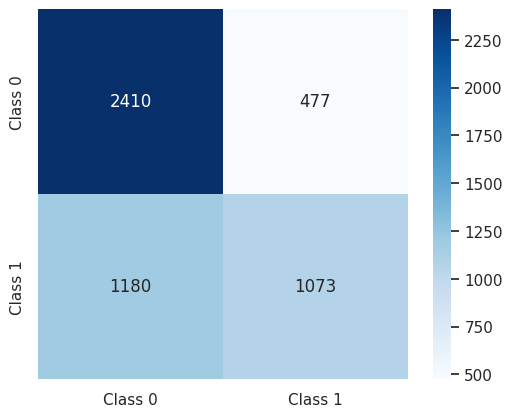

In [179]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, make_scorer

# Assuming rf_classifier is the trained Random Forest model
# Assuming X_test_scaled is the scaled test set and y_test is the true labels

# Predict the labels using the Logistic Regression classifier on the scaled test set
y_pred = lr_classifier.predict(X_test_scaled)

# Compute the confusion matrix using true labels (y_test) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap using seaborn
print(sns.heatmap(conf_matrix , annot = True , fmt="d", cmap="Blues", square=True,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1']))

# Print the confusion matrix in text format
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

## 6.2-Random Forest Classifier

In [148]:
# Initialize a Random Forest classifier with a random seed for reproducibility and a maximum depth of 9
rf_classifier = RandomForestClassifier(random_state=42, max_depth=9)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix to evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the test accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# Print the confusion matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print a placeholder for the classification report (this part of the code is missing)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6825

Confusion Matrix:
[[2444  443]
 [1189 1064]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      2887
         1.0       0.71      0.47      0.57      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.66      5140
weighted avg       0.69      0.68      0.67      5140



## 6-3.Gradient Boosting Classifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating an instance of the GradientBoostingClassifier with a fixed random state for reproducibility
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fitting the GradientBoostingClassifier to the resampled and scaled training data
gb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Making predictions on the scaled test data using the trained classifier
y_pred = gb_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Generating the confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the test accuracy
print(f'\nTest Accuracy: {accuracy:.4f}')

# Printing the confusion matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Importing the classification_report function from scikit-learn and printing the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Test Accuracy: 0.6804

Confusion Matrix:
[[2409  478]
 [1165 1088]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.83      0.75      2887
         1.0       0.69      0.48      0.57      2253

    accuracy                           0.68      5140
   macro avg       0.68      0.66      0.66      5140
weighted avg       0.68      0.68      0.67      5140



## 6-4.Neural Network

In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [174]:
# Extract features and labels
X_1 = df.drop('shot_made_flag', axis=1).values
y_1 = df['shot_made_flag'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Normalization/Standardization
scaler_1 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [152]:
# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [153]:
# Initialize the model
input_size = X_train.shape[1]
model = SimpleNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [154]:
# Training loop
epochs = 10
batch_size = 40

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 0.5922098159790039
Epoch 2/10, Loss: 0.5746777057647705
Epoch 3/10, Loss: 0.5739977359771729
Epoch 4/10, Loss: 0.5703744292259216
Epoch 5/10, Loss: 0.5751100778579712
Epoch 6/10, Loss: 0.5797615051269531
Epoch 7/10, Loss: 0.590063214302063
Epoch 8/10, Loss: 0.5912564396858215
Epoch 9/10, Loss: 0.5875065922737122
Epoch 10/10, Loss: 0.5852551460266113


In [155]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = (predictions > 0.5).float()
    accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / len(y_test)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 64.75%


In [156]:
# Experiment with different neural network architectures, including the number of layers, neurons, and the activation functions
class ImprovedNN_1(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN_1, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [157]:
# Initialize the model
input_size = X_train.shape[1]
improved_model = ImprovedNN_1(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)

In [158]:
# Experiment with different learning rates and Training Epochs
epochs = 50
batch_size = 64

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = improved_model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/50, Loss: 0.5598887801170349
Epoch 2/50, Loss: 0.5184003710746765
Epoch 3/50, Loss: 0.47995856404304504
Epoch 4/50, Loss: 0.44161924719810486
Epoch 5/50, Loss: 0.4136333167552948
Epoch 6/50, Loss: 0.3516044020652771
Epoch 7/50, Loss: 0.2761794626712799
Epoch 8/50, Loss: 0.21030695736408234
Epoch 9/50, Loss: 0.15184767544269562
Epoch 10/50, Loss: 0.12090659141540527
Epoch 11/50, Loss: 0.10419094562530518
Epoch 12/50, Loss: 0.08364852517843246
Epoch 13/50, Loss: 0.0712001845240593
Epoch 14/50, Loss: 0.05643783509731293
Epoch 15/50, Loss: 0.05010911077260971
Epoch 16/50, Loss: 0.03829526528716087
Epoch 17/50, Loss: 0.03658575564622879
Epoch 18/50, Loss: 0.03765333443880081
Epoch 19/50, Loss: 0.030391646549105644
Epoch 20/50, Loss: 0.026324093341827393
Epoch 21/50, Loss: 0.028289278969168663
Epoch 22/50, Loss: 0.025311719626188278
Epoch 23/50, Loss: 0.03951384499669075
Epoch 24/50, Loss: 0.01144682802259922
Epoch 25/50, Loss: 0.011323130689561367
Epoch 26/50, Loss: 0.04093667119741

In [159]:
# Evaluate the model
improved_model.eval()
with torch.no_grad():
    predictions = improved_model(X_test)
    predictions = (predictions > 0.5).float()
    accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / len(y_test)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 59.24%


In [160]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 59.24%
Precision: 53.93%
Recall: 48.16%
F1 Score: 50.88%


In [161]:
# Batch Normalization
class ImprovedNN_2(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN_2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [162]:
# Initialize the model
input_size = X_train.shape[1]
improved_model = ImprovedNN_2(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)

In [163]:
epochs = 50
batch_size = 64

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = improved_model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/50, Loss: 0.6017501950263977
Epoch 2/50, Loss: 0.5051659941673279
Epoch 3/50, Loss: 0.4099009931087494
Epoch 4/50, Loss: 0.3189780116081238
Epoch 5/50, Loss: 0.2589757740497589
Epoch 6/50, Loss: 0.21532854437828064
Epoch 7/50, Loss: 0.14137811958789825
Epoch 8/50, Loss: 0.0938274934887886
Epoch 9/50, Loss: 0.06677602231502533
Epoch 10/50, Loss: 0.04742463678121567
Epoch 11/50, Loss: 0.03826005756855011
Epoch 12/50, Loss: 0.03088669292628765
Epoch 13/50, Loss: 0.019686302170157433
Epoch 14/50, Loss: 0.020292488858103752
Epoch 15/50, Loss: 0.0202191062271595
Epoch 16/50, Loss: 0.02758917026221752
Epoch 17/50, Loss: 0.012540415860712528
Epoch 18/50, Loss: 0.008496789261698723
Epoch 19/50, Loss: 0.015242855064570904
Epoch 20/50, Loss: 0.006962028332054615
Epoch 21/50, Loss: 0.009307236410677433
Epoch 22/50, Loss: 0.007516543380916119
Epoch 23/50, Loss: 0.007143175229430199
Epoch 24/50, Loss: 0.002107058884575963
Epoch 25/50, Loss: 0.006186028942465782
Epoch 26/50, Loss: 0.003079728

In [164]:
# Evaluate the model
improved_model.eval()
with torch.no_grad():
    predictions = improved_model(X_test)
    predictions = (predictions > 0.5).float()
    accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / len(y_test)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 57.24%


In [165]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 57.24%
Precision: 51.02%
Recall: 61.30%
F1 Score: 55.69%


In [166]:
# Adding dropout layers
class ImprovedNN_3(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN_3, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [167]:
# More complex NN architecture did not improve the model performance
class AdvancedNN(nn.Module):
    def __init__(self, input_size):
        super(AdvancedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [168]:
# Initialize the model
input_size = X_train.shape[1]
improved_model = ImprovedNN_3(input_size)

# Define loss function
criterion = nn.BCELoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)
# optimizer = optim.RMSprop(improved_model.parameters(), lr=0.001)


In [169]:
# Add learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

epochs = 40
batch_size = 60

# Training loop
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        batch_y = y_train[i:i + batch_size]

        optimizer.zero_grad()
        outputs = improved_model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Updating the learning rate
    scheduler.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/40, Loss: 0.6517370343208313
Epoch 2/40, Loss: 0.5763807892799377
Epoch 3/40, Loss: 0.554530143737793
Epoch 4/40, Loss: 0.5512434244155884
Epoch 5/40, Loss: 0.5571759343147278
Epoch 6/40, Loss: 0.5488831400871277
Epoch 7/40, Loss: 0.5129914879798889
Epoch 8/40, Loss: 0.5143142938613892
Epoch 9/40, Loss: 0.5223230123519897
Epoch 10/40, Loss: 0.5294877290725708
Epoch 11/40, Loss: 0.5193356275558472
Epoch 12/40, Loss: 0.4847514033317566
Epoch 13/40, Loss: 0.5349500775337219
Epoch 14/40, Loss: 0.5032980442047119
Epoch 15/40, Loss: 0.5419229865074158
Epoch 16/40, Loss: 0.49378421902656555
Epoch 17/40, Loss: 0.49029168486595154
Epoch 18/40, Loss: 0.4832955300807953
Epoch 19/40, Loss: 0.4355429708957672
Epoch 20/40, Loss: 0.45567595958709717
Epoch 21/40, Loss: 0.481120765209198
Epoch 22/40, Loss: 0.41255414485931396
Epoch 23/40, Loss: 0.440007746219635
Epoch 24/40, Loss: 0.4330034554004669
Epoch 25/40, Loss: 0.3947199881076813
Epoch 26/40, Loss: 0.4246889352798462
Epoch 27/40, Loss: 0

In [170]:
# Evaluate the model
improved_model.eval()
with torch.no_grad():
    predictions = improved_model(X_test)
    predictions = (predictions > 0.5).float()
    accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / len(y_test)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 66.87%


In [171]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 66.87%
Precision: 67.86%
Recall: 46.38%
F1 Score: 55.10%


#### Overall, during the test of different variations of our NN algorithm, we found out that using a more complex neural network architectures, experiencing different learning rates and training epochs, using batch normalization, and advanced optimizers did not improve the model performance significantly. Only adding learning rate scheduling, which involves adjusting the learning rate during training, helped to enhance model convergence and performance. Finally, with all these variations of the NN algorithm, we almost reached the average accuracy gained from the other three algorithms.

## 6-5.Voting Ensemble

Test Accuracy: 0.6829

Confusion Matrix:
Axes(0.1675,0.11;0.5775x0.77)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      2887
         1.0       0.71      0.47      0.57      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.66      5140
weighted avg       0.69      0.68      0.67      5140



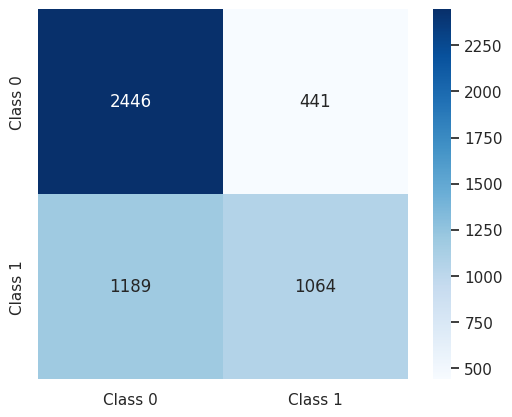

In [172]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier

# Initialize a list to store the individual classifiers
estimators = []

# Add a Gradient Boosting Classifier to the list with specified hyperparameters
estimators.append(('gbm', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, max_features=15, warm_start=True, random_state=42)))

# Add a Random Forest Classifier to the list with specified hyperparameters
estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=200, max_features=20, criterion='entropy', random_state=42)))

# Add an AdaBoost Classifier to the list with specified hyperparameters
estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1e-2, n_estimators=10, random_state=42)))

# Create a Voting Classifier using the list of individual classifiers
# Set voting to 'soft' and provide weights for each classifier
ensemble = VotingClassifier(estimators, voting='soft', weights=[3,3,1])

# Train the ensemble classifier on the training data
ensemble.fit(X_train, y_train)

# Use the trained ensemble classifier to predict the target values on the test data
y_pred = ensemble.predict(X_test)

# Calculate and print the accuracy of the ensemble classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate and print the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1']))

# The following lines are incomplete, but assuming you want to print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Prediction for kaggle competition

In [180]:
# This code is used to create the submission file. We provided an screen shot of our submission with the corresponding link in our report.
shot_ids = missing_value_df.index + 1
probabilities = lr_classifier.predict_proba(scaler.transform(missing_value_df))[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'shot_id': shot_ids, 'shot_made_flag': probabilities})

# Set 'shot_id' as the index
submission_df.set_index('shot_id', inplace=True)

# Save the DataFrame to a CSV file
submission_df.to_csv('kaggle_submission_lr.csv')

# Display the first few rows of the submission DataFrame
print(submission_df.head())

         shot_made_flag
shot_id                
1              0.578968
8              0.482779
17             0.723375
20             0.773010
33             0.383347
